In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.grid_search import GridSearchCV
from sklearn import ensemble , cross_validation
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score


%matplotlib inline

## Считывание и препроцессинг данных

In [2]:
data_t = pd.read_csv('trainingData_tabular_chunk1.csv')

In [3]:
data_t.head()

,gamestate_id,decision,turn,opponent.armor,opponent.attack,opponent.hero_card_id,opponent.hp,opponent.special_skill_used,opponent.weapon_durability,opponent.crystals_all,...,player.played.hp_current,player.played.hp_max,player.hand.nOfMinions,player.hand.nOfSpells,player.hand.nOfWeapons,player.hand.nOfCards,player.hand.nOfPlayable,player.hand.attack,player.hand.crystals_cost,player.hand.hp
0,4687346,1,14,0,0,798,5,0,0,10,...,20,23,4,0,1,5,0,20,22,17
1,3270826,1,7,0,0,754,22,0,0,6,...,16,17,3,2,2,7,0,17,26,20
2,3189487,1,5,3,0,612,29,0,0,4,...,0,0,5,0,0,5,2,26,28,27
3,4098946,1,8,0,0,390,26,0,0,7,...,2,2,7,1,1,9,9,36,44,36
4,2661127,0,13,0,0,25,30,0,0,10,...,7,7,4,0,0,4,4,13,13,14


In [4]:
labels = data_t.decision
data_t.drop(['decision', 'gamestate_id'], axis=1, inplace=True)

In [5]:
train_data, test_data, train_labels, test_labels = train_test_split(np.array(data_t), np.array(labels), test_size=0.3)

In [6]:
train_data.mean(axis=0)

array([  8.93591143e+00,   2.81634286e-01,   2.46048571e-01,
         6.27420954e+02,   2.12273657e+01,   6.93742857e-02,
         1.73251429e-01,   6.93568286e+00,   2.24303429e+00,
         1.68995743e+01,   5.23142857e-03,   4.90855429e+00,
         1.66622857e+00,   3.42154286e-01,   3.46511429e-01,
         6.33636189e+02,   2.17515143e+01,   1.59185714e-01,
         2.26528571e-01,   7.42943714e+00,   4.10097429e+00,
         1.70282543e+01,   3.84000000e-03,   4.60856857e+00,
         1.87326000e+00,   1.66622857e+00,   5.63088286e+00,
         5.59277143e+00,   5.31042286e+00,   6.56383143e+00,
         1.87326000e+00,   6.30701143e+00,   6.19863714e+00,
         5.91323714e+00,   7.33887429e+00,   3.37144000e+00,
         1.06725714e+00,   1.69871429e-01,   4.60856857e+00,
         2.34682286e+00,   1.36452057e+01,   1.87575457e+01,
         1.54982771e+01])

In [7]:
scaler = StandardScaler().fit(train_data, train_labels) # нормализируем данные

/home/manjake/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [8]:
train_data_scaled = scaler.transform(train_data)
test_data_scaled = scaler.transform(test_data)

In [9]:
train_data_scaled.mean(axis=0)

array([  2.19806871e-16,  -6.09754152e-16,  -3.23295295e-15,
        -4.25007648e-15,   1.28732644e-15,   7.75784516e-15,
         4.42609758e-16,  -5.40985411e-17,   7.31602081e-16,
         2.51777964e-17,   3.73134678e-15,  -1.51505475e-16,
         6.17671477e-15,  -1.86734691e-15,  -7.50519329e-16,
        -2.45939142e-16,   1.37850889e-15,  -8.91972845e-16,
        -2.14129539e-15,   2.53382315e-16,   1.55786828e-15,
        -5.28789155e-16,   1.15921035e-15,   1.08387204e-15,
        -7.02761658e-17,   6.17671477e-15,   9.16316626e-16,
        -7.79313439e-16,   1.85909922e-15,  -1.01861369e-15,
        -7.02761658e-17,  -9.70015655e-16,   2.17587852e-18,
        -2.20440047e-15,  -4.11553688e-16,   9.35109450e-16,
         1.72650362e-15,   3.03044891e-16,   1.08387204e-15,
         3.31000307e-16,   2.46355317e-17,  -8.41707656e-17,
        -2.25058067e-17])

In [12]:
data_t.corrwith(labels) # корреляция признаков с целевым значением

turn                             0.025309
opponent.armor                  -0.050317
opponent.attack                  0.006425
opponent.hero_card_id            0.006266
opponent.hp                     -0.210190
opponent.special_skill_used     -0.017355
opponent.weapon_durability       0.010245
opponent.crystals_all            0.024226
opponent.crystals_current        0.076172
opponent.deck_count             -0.021028
opponent.fatigue_damage          0.020843
opponent.hand_count              0.033283
opponent.played_minions_count   -0.231923
player.armor                     0.054218
player.attack                    0.001640
player.hero_card_id              0.001729
player.hp                        0.171204
player.special_skill_used        0.007366
player.weapon_durability        -0.006736
player.crystals_all              0.026969
player.crystals_current         -0.008248
player.deck_count               -0.025536
player.fatigue_damage            0.005818
player.hand_count               -0

## Задание 1

Логистическая регрессия

In [11]:
toy_data_scaled, toy_labels = train_data_scaled[:10000], train_labels[:10000]

In [13]:
lr = LogisticRegression().fit(toy_data_scaled, toy_labels)

In [14]:
accuracy_score(lr.predict(test_data_scaled), test_labels)

0.69607333333333332

In [15]:
train_sizes, train_scores, test_scores = learning_curve(
        LogisticRegression(), toy_data_scaled, toy_labels, cv=5, train_sizes=np.linspace(.1, 1.0, 20), scoring='accuracy')

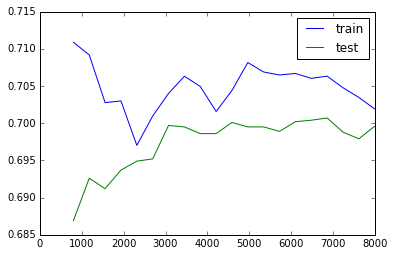

In [16]:
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='test')
plt.legend(loc=0)
plt.show()

Из графика видно, что модель обучается относительно неплохо, ошибка на трейне и тесте сходится.
Попробуем использовать большую выборку

In [18]:
lr_ext = LogisticRegression().fit(train_data_scaled, train_labels)

In [19]:
accuracy_score(lr_ext.predict(test_data_scaled), test_labels)

0.69874000000000003

In [20]:
train_sizes, train_scores, test_scores = learning_curve(
        LogisticRegression(), train_data_scaled, train_labels, cv=5, train_sizes=np.linspace(.1, 0.4, 10), scoring='accuracy')

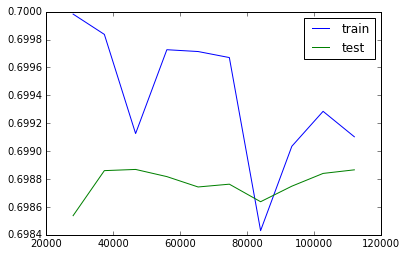

In [21]:
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='test')
plt.legend(loc=0)
plt.show()

Стало немного лучше

## Отбор признаков

In [22]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(toy_data_scaled, toy_labels)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

Feature ranking:
1. feature 4 (0.049526), opponent.hp
2. feature 16 (0.044831), player.hp
3. feature 29 (0.034492), opponent.played.hp_max
4. feature 26 (0.033564), opponent.played.attack
5. feature 31 (0.033470), player.played.attack
6. feature 34 (0.032995), player.played.hp_max
7. feature 41 (0.032846), player.hand.crystals_cost
8. feature 42 (0.032734), player.hand.hp
9. feature 28 (0.032372), opponent.played.hp_current
10. feature 32 (0.032077), player.played.crystals_cost
11. feature 3 (0.032028), opponent.hero_card_id
12. feature 40 (0.031718), player.hand.attack
13. feature 27 (0.031445), opponent.played.crystals_cost
14. feature 15 (0.030750), player.hero_card_id
15. feature 33 (0.028806), player.played.hp_current
16. feature 11 (0.027422), opponent.hand_count
17. feature 8 (0.025965), opponent.crystals_current
18. feature 39 (0.024909), player.hand.nOfPlayable
19. feature 35 (0.024875), player.hand.nOfMinions
20. feature 36 (0.024343), player.hand.nOfSpells
21. feature 24 (0.

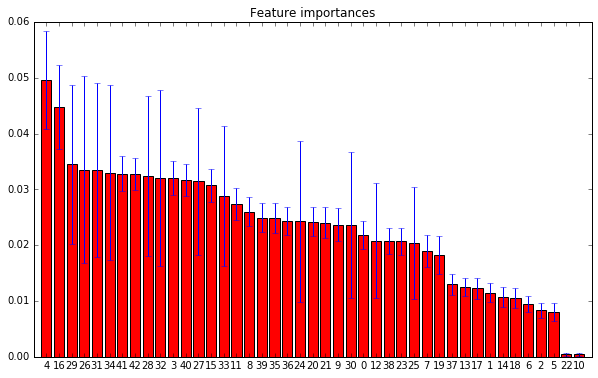

In [23]:
print("Feature ranking:")

for f in range(toy_data_scaled.shape[1]):
    print("%d. feature %d (%f), %s" % (f + 1, indices[f], importances[indices[f]], data_t.columns[indices[f]]))

plt.figure(figsize=(10,6))
plt.title("Feature importances")
plt.bar(range(toy_data_scaled.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(toy_data_scaled.shape[1]), indices)
plt.xlim([-1, toy_data_scaled.shape[1]])
plt.show()

In [24]:
model = SelectFromModel(forest, prefit=True)
toy_data_new = model.transform(toy_data_scaled)
toy_data_new.shape

(10000, 25)

In [25]:
train_sizes, train_scores, test_scores = learning_curve(
        LogisticRegression(), toy_data_new, toy_labels, cv=5, train_sizes=np.linspace(.1, 1.0, 20), scoring='accuracy')

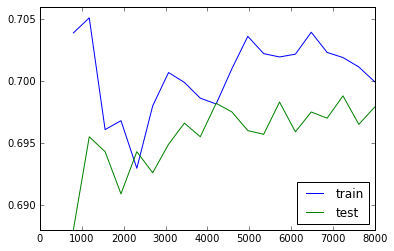

In [26]:
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='test')
plt.legend(loc=0)
plt.show()

In [28]:
lr_selected = LogisticRegression().fit(toy_data_new, toy_labels)

In [30]:
accuracy_score(lr_selected.predict(model.transform(test_data_scaled)), test_labels)

0.69552000000000003

Отбор признаков результат не улучшил

## Задание 2

In [34]:
parameters_grid = {
    #'gamma' : [0.0, 0.1, 0.3],
    'learning_rate': [0.05, 0.1, 0.15, 0.3],
    'max_depth': [3,5,7],
    'n_estimators': [100, 500],
    'colsample_bytree': [0.5],
    'reg_lambda': [1.0, 0.9, 0.5],
    #'reg_alpha': [0.0, 0.1, 0.5],
    #'objective': ['reg:linear'],
    #'min_child_weight': [1,3,5,7],
}

In [35]:
grid_cv = GridSearchCV(xgb.XGBClassifier(), parameters_grid, scoring = 'accuracy')

In [36]:
%%time
grid_cv.fit(toy_data_scaled, toy_labels)

CPU times: user 27min 30s, sys: 7.62 s, total: 27min 37s
Wall time: 7min 51s


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 500], 'reg_lambda': [1.0, 0.9, 0.5], 'learning_rate': [0.05, 0.1, 0.15, 0.3], 'colsample_bytree': [0.5], 'max_depth': [3, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [37]:
print grid_cv.best_score_
grid_cv.best_estimator_

0.6962


XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.5,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=0.9,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [38]:
accuracy_score(grid_cv.best_estimator_.predict(test_data_scaled), test_labels)

0.69531333333333334

Лучше не стало, результат сравним с обычной регрессией. Это говорит нам о том, что фичи, описывающие игровое состояние, построены не лучшим образом и больше никаких закономерностей обнаружить на них нельзя. (ну или делать перебор по большей сетке, но нет вычислительных ресурсов)